<a href="https://colab.research.google.com/github/Jay-5051/py/blob/master/009_Jayesh_Patil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
from sklearn.svm import SVR 
from sklearn.ensemble import RandomForestRegressor

In [82]:
import chardet
file='/content/Training.csv'
with open(file, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'confidence': 0.73, 'encoding': 'ISO-8859-1', 'language': ''}

In [83]:
df = pd.read_csv(r"/content/Training.csv",encoding='ISO-8859-1')

In [130]:
df2 = pd.read_csv(r"/content/Testing.csv")

In [131]:
df2

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,aspect_ratio,movie_facebook_likes
0,Color,Bryan Singer,434.0,169.0,0.0,903.0,Marlon Brando,18000,200069408.0,Action|Adventure|Sci-Fi,Kevin Spacey,Superman Returns,240396,29991,Frank Langella,0.0,crystal|epic|lex luthor|lois lane|return to earth,http://www.imdb.com/title/tt0348150/?ref_=fn_t...,2367.0,English,USA,PG-13,209000000.0,2006.0,10000.0,2.35,0
1,Color,Peter Jackson,422.0,164.0,0.0,773.0,Adam Brown,5000,255108370.0,Adventure|Fantasy,Aidan Turner,The Hobbit: The Battle of the Five Armies,354228,9152,James Nesbitt,0.0,army|elf|hobbit|middle earth|orc,http://www.imdb.com/title/tt2310332/?ref_=fn_t...,802.0,English,New Zealand,PG-13,250000000.0,2014.0,972.0,2.35,65000
2,Color,Peter Jackson,509.0,186.0,0.0,773.0,Adam Brown,5000,258355354.0,Adventure|Fantasy,Aidan Turner,The Hobbit: The Desolation of Smaug,483540,9152,James Nesbitt,6.0,dwarf|elf|lake town|mountain|sword and sorcery,http://www.imdb.com/title/tt1170358/?ref_=fn_t...,951.0,English,USA,PG-13,225000000.0,2013.0,972.0,2.35,83000
3,Color,Colin Trevorrow,644.0,124.0,365.0,1000.0,Judy Greer,3000,652177271.0,Action|Adventure|Sci-Fi|Thriller,Bryce Dallas Howard,Jurassic World,418214,8458,Omar Sy,0.0,dinosaur|disaster film|experiment gone wrong|j...,http://www.imdb.com/title/tt0369610/?ref_=fn_t...,1290.0,English,USA,PG-13,150000000.0,2015.0,2000.0,2.00,150000
4,Color,Sam Raimi,300.0,135.0,0.0,4000.0,James Franco,24000,373377893.0,Action|Adventure|Fantasy|Romance,J.K. Simmons,Spider-Man 2,411164,43388,Kirsten Dunst,1.0,death|doctor|scientist|super villain|tentacle,http://www.imdb.com/title/tt0316654/?ref_=fn_t...,1303.0,English,USA,PG-13,200000000.0,2004.0,11000.0,2.35,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Color,Olivier Assayas,81.0,110.0,107.0,45.0,Béatrice Dalle,576,136007.0,Drama|Music|Romance,Maggie Cheung,Clean,3924,776,Don McKellar,1.0,jail|junkie|money|motel|singer,http://www.imdb.com/title/tt0388838/?ref_=fn_t...,39.0,French,France,R,4500.0,2004.0,133.0,2.35,171
996,Color,Kiyoshi Kurosawa,78.0,111.0,62.0,6.0,Anna Nakagawa,89,94596.0,Crime|Horror|Mystery|Thriller,Kôji Yakusho,The Cure,6318,115,Denden,0.0,breasts|interrogation|investigation|murder|wat...,http://www.imdb.com/title/tt0123948/?ref_=fn_t...,50.0,Japanese,Japan,NaN,1000000.0,1997.0,13.0,1.85,817
997,Color,Ash Baron-Cohen,10.0,98.0,3.0,152.0,Stanley B. Herman,789,NaN,Crime|Drama,Peter Greene,Bang,438,1186,James Noble,1.0,corruption|homeless|homeless man|motorcycle|ur...,http://www.imdb.com/title/tt0109266/?ref_=fn_t...,14.0,English,USA,NaN,NaN,1995.0,194.0,NaN,20
998,Color,Anthony Vallone,NaN,84.0,2.0,2.0,John Considine,45,NaN,Crime|Drama,Richard Jewell,The Mongol King,36,93,Sara Stepnicka,0.0,jewell|mongol|nostradamus|stepnicka|vallone,http://www.imdb.com/title/tt0430371/?ref_=fn_t...,1.0,English,USA,PG-13,3250.0,2005.0,44.0,NaN,4


In [86]:
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,NaN,NaN,95.0,54.0,NaN,0.0,Royce Johnson,577.0,NaN,Action|Adventure|Crime|Drama|Sci-Fi|Thriller,Elden Henson,Daredevil,213483,581,Charlie Cox,0.0,corruption|lawyer|partnership|superhero|vigilante,http://www.imdb.com/title/tt3322312/?ref_=fn_t...,394.0,English,USA,TV-MA,NaN,NaN,4.0,8.8,16.0,55000
1,Color,NaN,12.0,43.0,NaN,218.0,Matt Ryan,1000.0,NaN,Drama|Fantasy|Horror|Thriller,Harold Perrineau,Constantine,36919,1990,Charles Halford,1.0,based on comic|based on comic book|dc arrowver...,http://www.imdb.com/title/tt3489184/?ref_=fn_t...,94.0,English,USA,TV-14,NaN,NaN,560.0,7.5,16.0,10000
2,Color,NaN,39.0,45.0,NaN,160.0,Katia Winter,898.0,NaN,Adventure|Drama|Fantasy|Mystery|Thriller,Nicole Beharie,Sleepy Hollow,49049,1430,Lyndie Greenwood,0.0,apocalypse|death|husband wife relationship|mot...,http://www.imdb.com/title/tt2647544/?ref_=fn_t...,110.0,English,USA,TV-14,NaN,NaN,372.0,7.5,16.0,14000
3,Color,NaN,4.0,30.0,NaN,359.0,Kaitlyn Dever,995.0,NaN,Comedy,Hector Elizondo,Last Man Standing,15114,2465,Nancy Travis,1.0,family relationships|husband wife relationship...,http://www.imdb.com/title/tt1828327/?ref_=fn_t...,87.0,English,USA,TV-PG,NaN,NaN,363.0,7.4,16.0,0
4,Color,NaN,26.0,22.0,NaN,676.0,Noureen DeWulf,883.0,NaN,Comedy|Romance,Barry Corbin,Anger Management,26992,4115,Brian Austin Green,1.0,anger management|argument|irony|sarcasm|therapist,http://www.imdb.com/title/tt1986770/?ref_=fn_t...,54.0,English,USA,NaN,NaN,NaN,701.0,6.7,16.0,0


In [87]:
df.isna().sum()

color                         17
director_name                 83
num_critic_for_reviews        40
duration                      12
director_facebook_likes       83
actor_3_facebook_likes        19
actor_2_name                  11
actor_1_facebook_likes         7
gross                        705
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  19
facenumber_in_poster          11
plot_keywords                122
movie_imdb_link                0
num_user_for_reviews          16
language                      11
country                        5
content_rating               234
budget                       377
title_year                    87
actor_2_facebook_likes        11
imdb_score                     0
aspect_ratio                 267
movie_facebook_likes           0
dtype: int64

In [88]:
df = df.dropna()

In [145]:
df2 = df2.dropna()

In [89]:
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
29,Color,Joseph Dorman,29.0,93.0,0.0,59.0,Peter Riegert,399.0,906666.0,Documentary,Rachel Dratch,Sholem Aleichem: Laughing in the Darkness,154,660,Jason Kravits,1.0,jewish identity,http://www.imdb.com/title/tt1976608/?ref_=fn_t...,5.0,English,USA,Unrated,500000.0,2011.0,169.0,6.8,16.00,287
47,Color,Quentin Tarantino,596.0,187.0,16000.0,1000.0,Jennifer Jason Leigh,46000.0,54116191.0,Crime|Drama|Mystery|Thriller|Western,Craig Stark,The Hateful Eight,272839,49912,Zoë Bell,1.0,blizzard|blood vomiting|bounty hunter|murder|s...,http://www.imdb.com/title/tt3460252/?ref_=fn_t...,1018.0,English,USA,R,44000000.0,2015.0,1000.0,7.9,2.76,114000
48,Color,George Stevens,27.0,225.0,126.0,202.0,Carroll Baker,940.0,8000000.0,Biography|Drama|History,Martin Landau,The Greatest Story Ever Told,6484,1934,José Ferrer,6.0,70mm film|biblical epic|faith|jewish|king herod,http://www.imdb.com/title/tt0059245/?ref_=fn_t...,100.0,English,USA,G,20000000.0,1965.0,208.0,6.6,2.76,1000
49,Color,Stanley Kramer,61.0,197.0,176.0,760.0,Sid Caesar,924.0,46300000.0,Action|Adventure|Comedy|Crime,Jonathan Winters,"It's a Mad, Mad, Mad, Mad World",29323,4109,Spencer Tracy,0.0,california|desert|dying words|money|race,http://www.imdb.com/title/tt0057193/?ref_=fn_t...,344.0,English,USA,Approved,9400000.0,1963.0,898.0,7.6,2.76,0
51,Color,John Dahl,121.0,93.0,131.0,90.0,Aaron Hughes,497.0,2426851.0,Comedy|Crime|Romance|Thriller,Philip Baker Hall,You Kill Me,16224,776,Jayne Eastwood,1.0,alcoholic|buffalo new york|claim in title|emba...,http://www.imdb.com/title/tt0796375/?ref_=fn_t...,76.0,English,USA,R,4000000.0,2007.0,113.0,6.5,2.55,830


In [90]:
df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

**Histogram of Imdb rating**

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.25 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


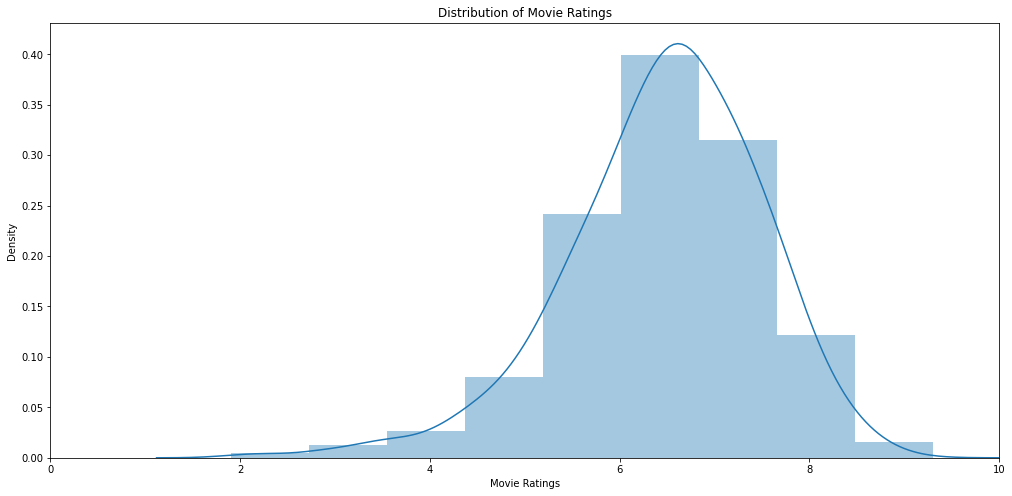

In [91]:
plt.figure(figsize=(17,8))
ax = sns.distplot(df['imdb_score'], bins=9, kde_kws={"bw": 0.25}, 
                  axlabel='Movie Ratings')
ax.set(xlim=(0, 10))
ax.set_title("Distribution of Movie Ratings");

In [92]:
movie_ratings = df[['imdb_score', 'budget', 'num_critic_for_reviews','duration','gross',
                    'num_voted_users','cast_total_facebook_likes', 'movie_facebook_likes',
                   'num_user_for_reviews','title_year']]

In [93]:
movie_ratings = movie_ratings.dropna()

**Pair Plot**

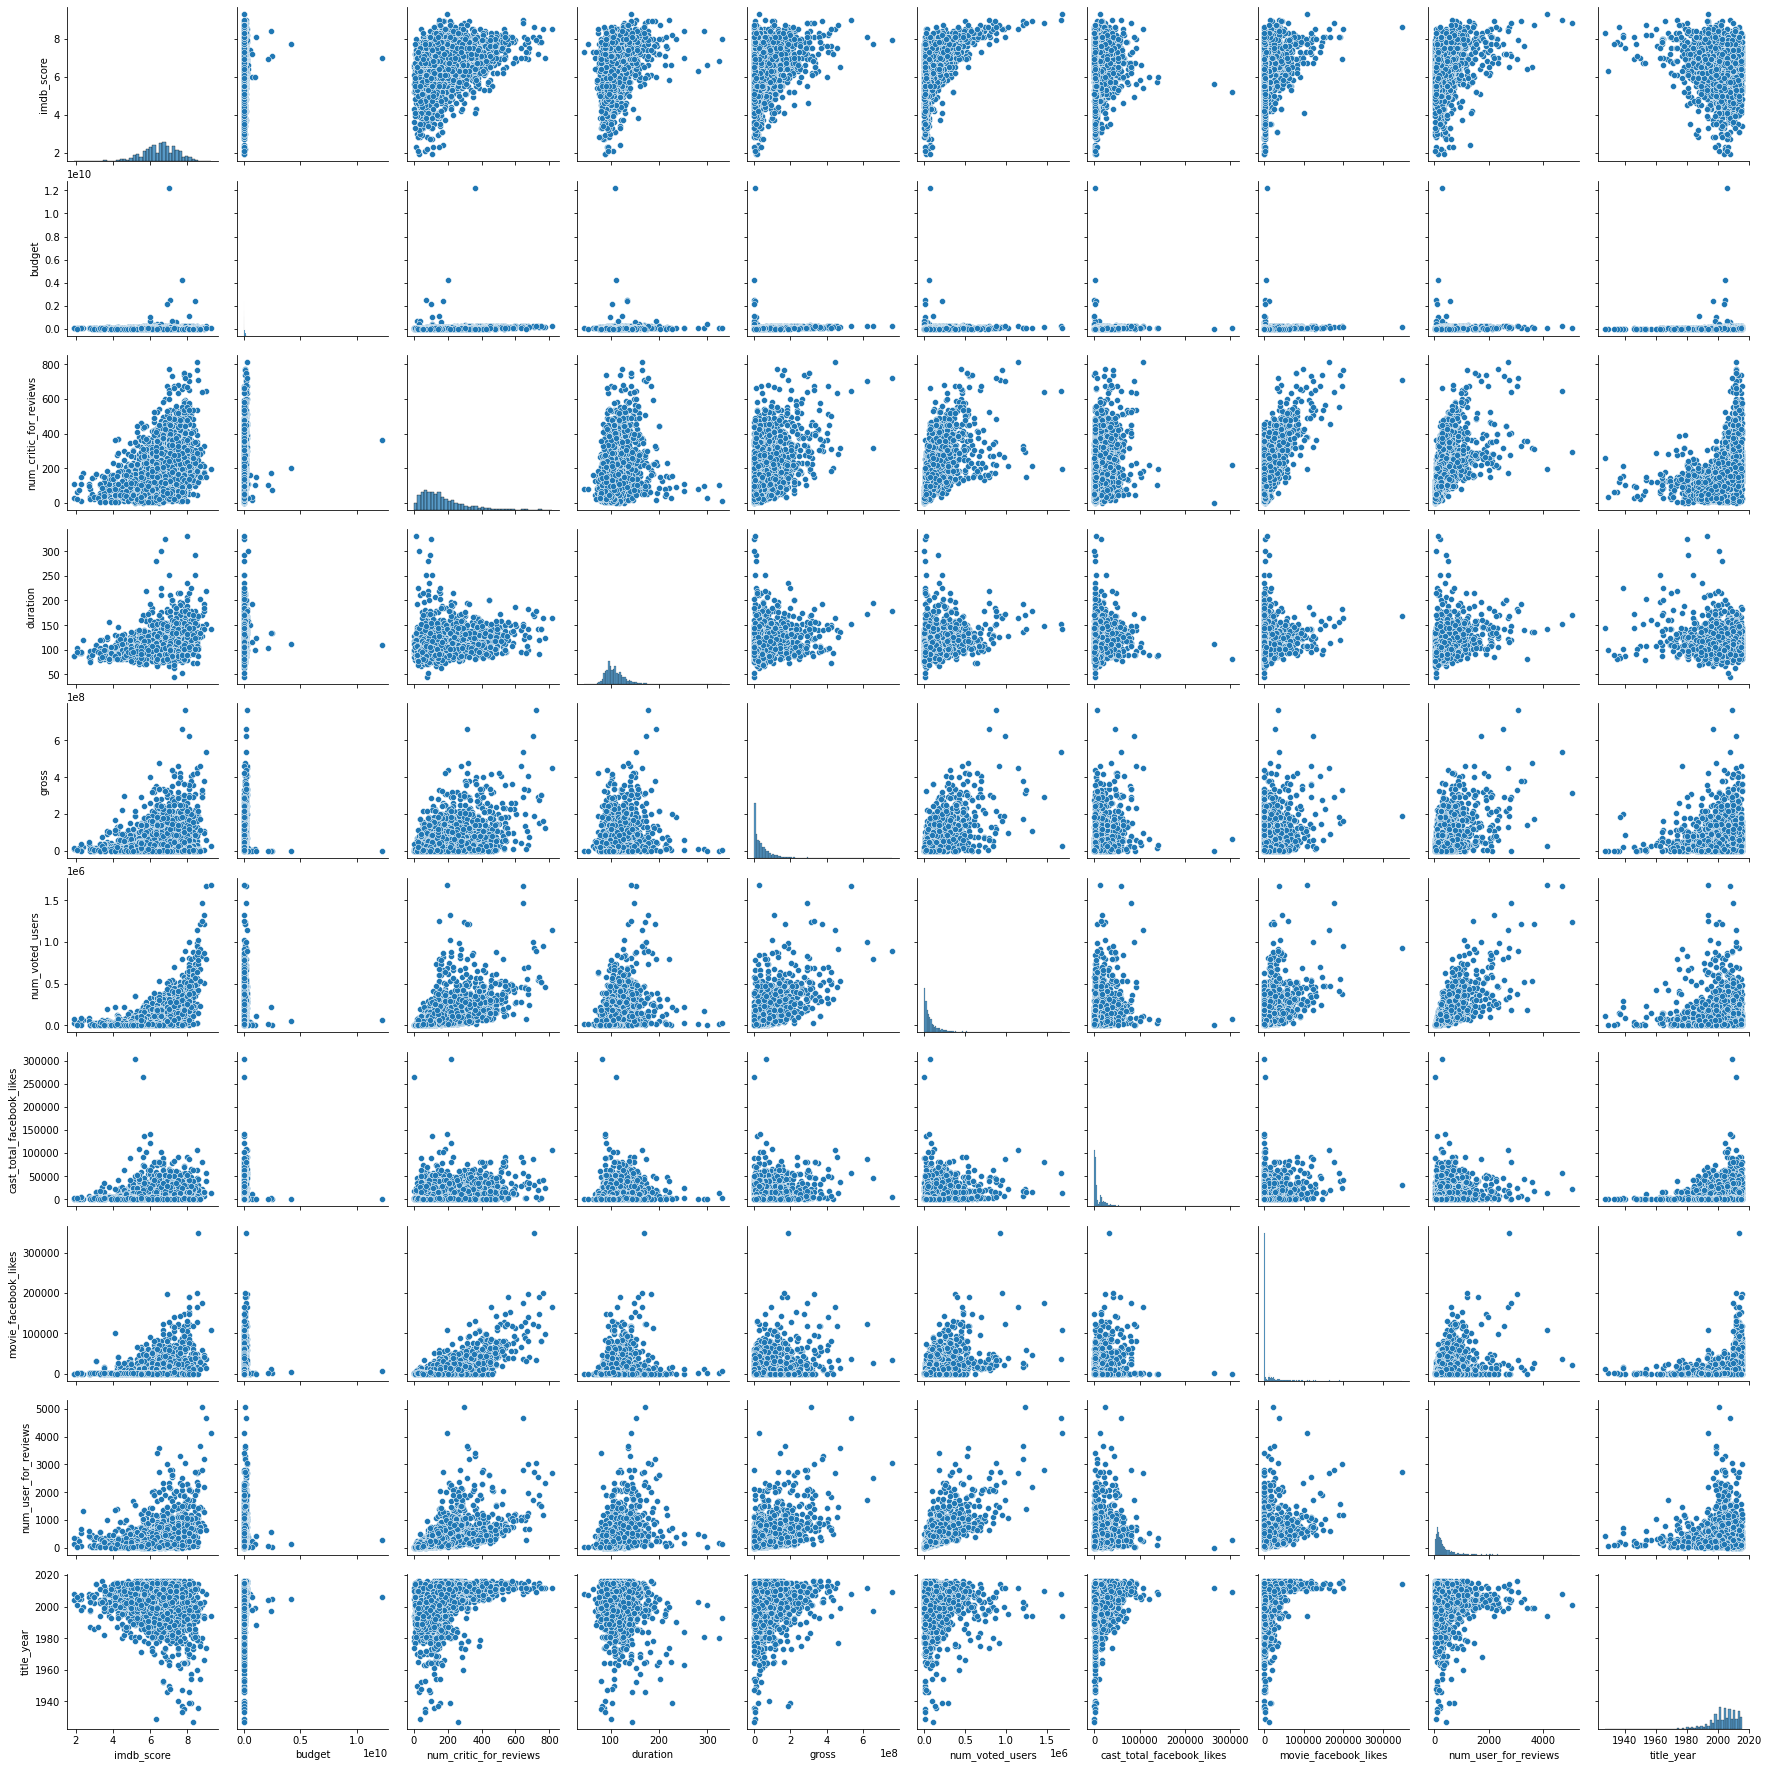

In [94]:
sns.pairplot(movie_ratings[['imdb_score', 'budget', 'num_critic_for_reviews','duration','gross',
                    'num_voted_users','cast_total_facebook_likes', 'movie_facebook_likes',
                   'num_user_for_reviews','title_year']])

**Joint Plot imdb rating vs budget**

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2073: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'imdb rating vs budget')

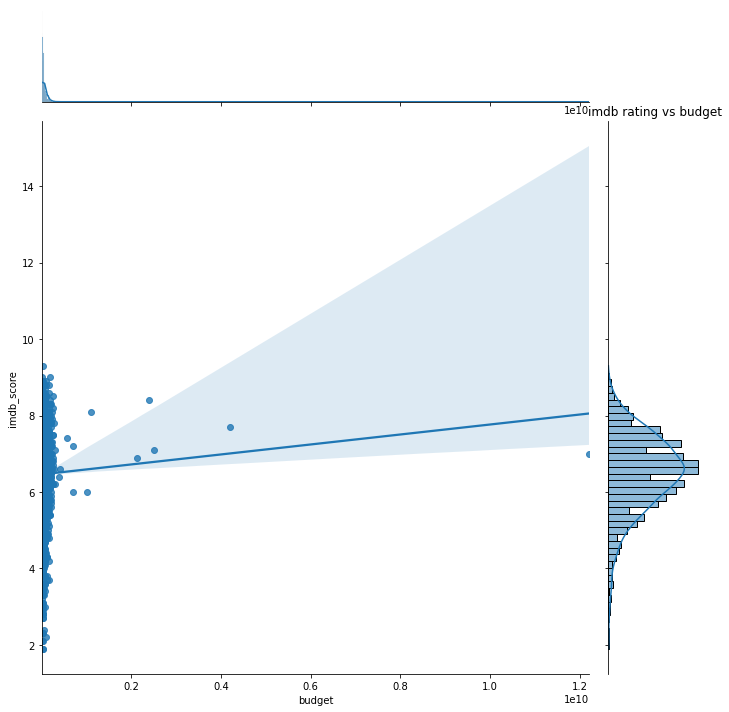

In [95]:
sns.jointplot(x='budget', y='imdb_score', data=movie_ratings, kind='reg', size=10)
plt.xlabel('budget')
plt.ylabel('imdb_score')
plt.title('imdb rating vs budget')

**Joint Plot imdb rating vs gross**

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2073: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'imdb rating vs gross')

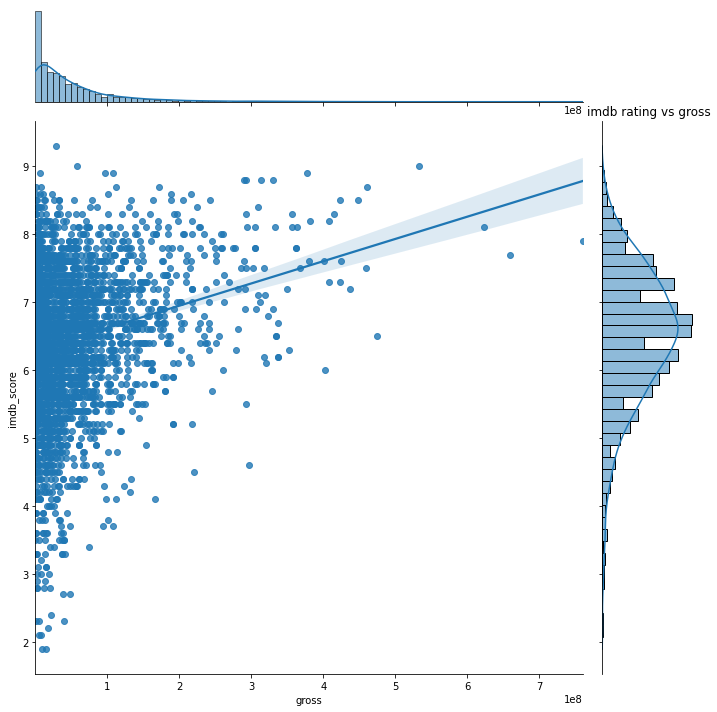

In [96]:
sns.jointplot(x='gross', y='imdb_score', data=movie_ratings, kind='reg', size=10)
plt.xlabel('gross')
plt.ylabel('imdb_score')
plt.title('imdb rating vs gross')

In [97]:
movie_ratings.columns

Index(['imdb_score', 'budget', 'num_critic_for_reviews', 'duration', 'gross',
       'num_voted_users', 'cast_total_facebook_likes', 'movie_facebook_likes',
       'num_user_for_reviews', 'title_year'],
      dtype='object')

**Joint Plot imdb rating vs num_critic_for_reviews**

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2073: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'imdb rating vs num_critic_for_reviews')

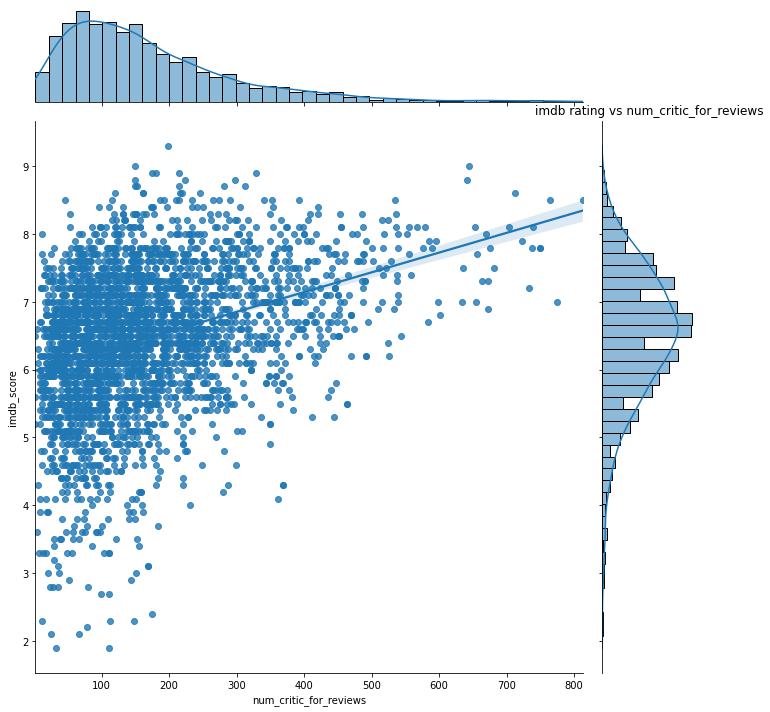

In [98]:
sns.jointplot(x='num_critic_for_reviews', y='imdb_score', data=movie_ratings, kind='reg', size=10)
plt.xlabel('num_critic_for_reviews')
plt.ylabel('imdb_score')
plt.title('imdb rating vs num_critic_for_reviews')

**Joint Plot imdb rating vs duration**

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2073: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'imdb rating vs duration')

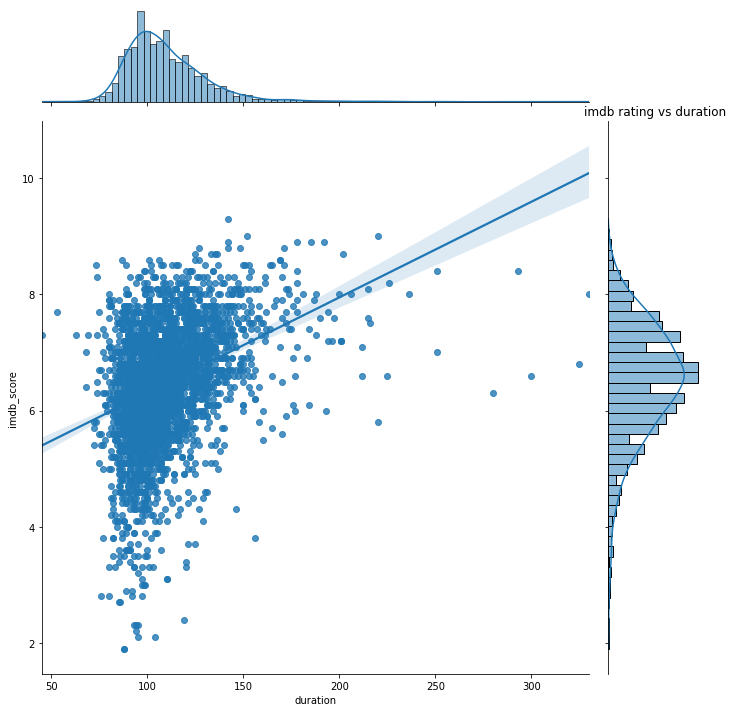

In [99]:
sns.jointplot(x='duration', y='imdb_score', data=movie_ratings, kind='reg', size=10)
plt.xlabel('duration')
plt.ylabel('imdb_score')
plt.title('imdb rating vs duration')

**Joint Plot imdb rating vs num_user_for_reviews**

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2073: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'imdb rating vs num_user_for_reviews')

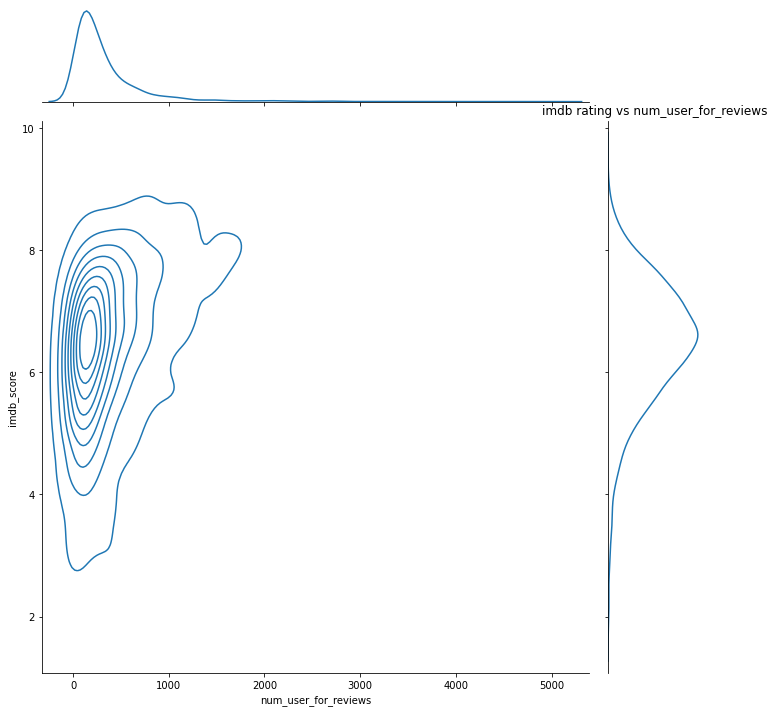

In [100]:
sns.jointplot(x='num_user_for_reviews', y='imdb_score', data=movie_ratings, kind='kde', size=10)
plt.xlabel('num_user_for_reviews')
plt.ylabel('imdb_score')
plt.title('imdb rating vs num_user_for_reviews')

**Joint Plot imdb rating vs title year**

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2073: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'imdb rating vs title_year')

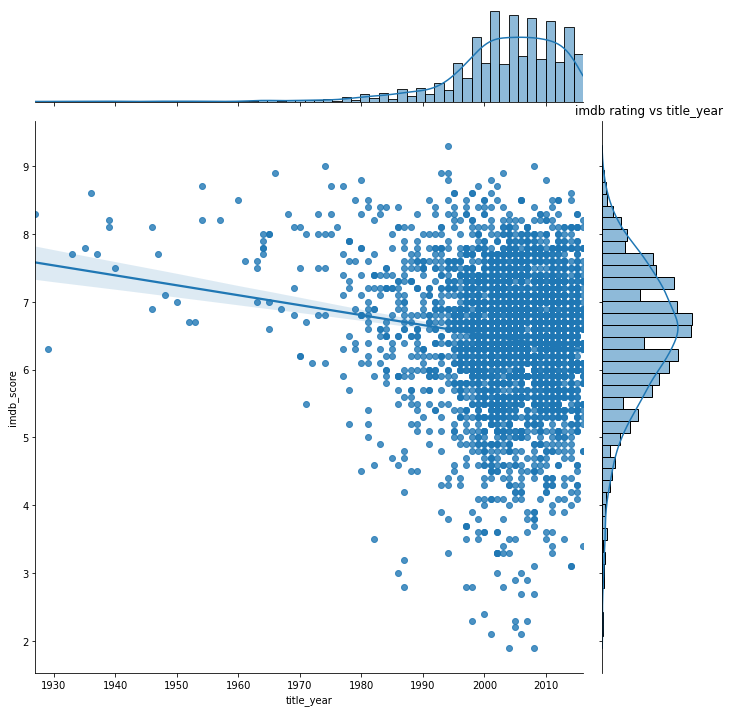

In [101]:
sns.jointplot(x='title_year', y='imdb_score', data=movie_ratings, kind='reg', size=10)
plt.xlabel('title_year')
plt.ylabel('imdb_score')
plt.title('imdb rating vs title_year')

**as per my observation these feature has no or the least impact on the movie rating so droping these column**

In [102]:
df=df.drop(columns=['movie_imdb_link','color','movie_title','facenumber_in_poster', 'plot_keywords',
                    'actor_3_name','movie_imdb_link','aspect_ratio','language'])
df

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes
29,Joseph Dorman,29.0,93.0,0.0,59.0,Peter Riegert,399.0,906666.0,Documentary,Rachel Dratch,154,660,5.0,USA,Unrated,500000.0,2011.0,169.0,6.8,287
47,Quentin Tarantino,596.0,187.0,16000.0,1000.0,Jennifer Jason Leigh,46000.0,54116191.0,Crime|Drama|Mystery|Thriller|Western,Craig Stark,272839,49912,1018.0,USA,R,44000000.0,2015.0,1000.0,7.9,114000
48,George Stevens,27.0,225.0,126.0,202.0,Carroll Baker,940.0,8000000.0,Biography|Drama|History,Martin Landau,6484,1934,100.0,USA,G,20000000.0,1965.0,208.0,6.6,1000
49,Stanley Kramer,61.0,197.0,176.0,760.0,Sid Caesar,924.0,46300000.0,Action|Adventure|Comedy|Crime,Jonathan Winters,29323,4109,344.0,USA,Approved,9400000.0,1963.0,898.0,7.6,0
51,John Dahl,121.0,93.0,131.0,90.0,Aaron Hughes,497.0,2426851.0,Comedy|Crime|Romance|Thriller,Philip Baker Hall,16224,776,76.0,USA,R,4000000.0,2007.0,113.0,6.5,830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3758,Michael Herz,49.0,96.0,6.0,14.0,Jessica Dublin,40.0,792966.0,Action|Comedy|Horror|Sci-Fi,Phoebe Legere,4663,99,40.0,USA,R,2300000.0,1989.0,30.0,5.1,321
3761,Thomas Vinterberg,98.0,105.0,346.0,141.0,Paprika Steen,280.0,1647780.0,Drama,Ulrich Thomsen,65951,821,258.0,Denmark,R,1300000.0,1998.0,278.0,8.1,5000
3763,John G. Avildsen,141.0,145.0,80.0,794.0,Burgess Meredith,13000.0,117235247.0,Drama|Sport,Sylvester Stallone,375240,16094,542.0,USA,PG,960000.0,1976.0,1000.0,8.1,0
3764,Steve James,53.0,170.0,23.0,2.0,Arthur Agee,7.0,7830611.0,Documentary|Drama|Sport,William Gates,18980,15,74.0,USA,PG-13,700000.0,1994.0,6.0,8.3,0


In [132]:
df2=df2.drop(columns=['movie_imdb_link','color','movie_title','facenumber_in_poster', 'plot_keywords',
                    'actor_3_name','movie_imdb_link','aspect_ratio','language'])

In [133]:
df2.head()

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,country,content_rating,budget,title_year,actor_2_facebook_likes,movie_facebook_likes
0,Bryan Singer,434.0,169.0,0.0,903.0,Marlon Brando,18000,200069408.0,Action|Adventure|Sci-Fi,Kevin Spacey,240396,29991,2367.0,USA,PG-13,209000000.0,2006.0,10000.0,0
1,Peter Jackson,422.0,164.0,0.0,773.0,Adam Brown,5000,255108370.0,Adventure|Fantasy,Aidan Turner,354228,9152,802.0,New Zealand,PG-13,250000000.0,2014.0,972.0,65000
2,Peter Jackson,509.0,186.0,0.0,773.0,Adam Brown,5000,258355354.0,Adventure|Fantasy,Aidan Turner,483540,9152,951.0,USA,PG-13,225000000.0,2013.0,972.0,83000
3,Colin Trevorrow,644.0,124.0,365.0,1000.0,Judy Greer,3000,652177271.0,Action|Adventure|Sci-Fi|Thriller,Bryce Dallas Howard,418214,8458,1290.0,USA,PG-13,150000000.0,2015.0,2000.0,150000
4,Sam Raimi,300.0,135.0,0.0,4000.0,James Franco,24000,373377893.0,Action|Adventure|Fantasy|Romance,J.K. Simmons,411164,43388,1303.0,USA,PG-13,200000000.0,2004.0,11000.0,0


In [104]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

df['content_rating']=le.fit_transform(df['content_rating'].values)
df['director_name']=le.fit_transform(df['director_name'].values)
df['genres']=le.fit_transform(df['genres'].values)

df['actor_1_name']=le.fit_transform(df['actor_1_name'].values)
df['actor_2_name']=le.fit_transform(df['actor_2_name'].values)

In [138]:
df['country']=le.fit_transform(df['country'].values)

In [148]:
df2['content_rating']=le.fit_transform(df2['content_rating'].values)
df2['director_name']=le.fit_transform(df2['director_name'].values)
df2['genres']=le.fit_transform(df2['genres'].values)

df2['actor_1_name']=le.fit_transform(df2['actor_1_name'].values)
df2['actor_2_name']=le.fit_transform(df2['actor_2_name'].values)

In [150]:
df2['country']=le.fit_transform(df2['country'].values)

In [142]:
df2.dtypes

director_name                  int64
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                   int64
actor_1_facebook_likes         int64
gross                        float64
genres                         int64
actor_1_name                   int64
num_voted_users                int64
cast_total_facebook_likes      int64
num_user_for_reviews         float64
country                       object
content_rating                 int64
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
movie_facebook_likes           int64
dtype: object

**Spliting feature (x) and value to be predicted(y)**

In [106]:
x=df.loc[:, df.columns != 'imdb_score'].values

In [107]:
y=df['imdb_score'].values

In [108]:
from sklearn.model_selection import train_test_split

In [109]:
X_train, X_test, Y_trian, Y_test= train_test_split(x,y, test_size=0.2, random_state=0)

In [110]:
print(X_train.shape, X_test.shape, Y_trian.shape, Y_test.shape)

(2418, 19) (605, 19) (2418,) (605,)


**Random Forest**

In [111]:
randregrssor=RandomForestRegressor(n_estimators=50)

In [112]:
randregrssor.fit(X_train,Y_trian)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [113]:
predictions = randregrssor.predict(X_test)

In [114]:
errors = abs(predictions - Y_test)

In [115]:
print('Mean Absolute Error:', round(np.mean(errors), 2))

Mean Absolute Error: 0.49


In [116]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / Y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 91.45 %.


(0.0, 10.0)

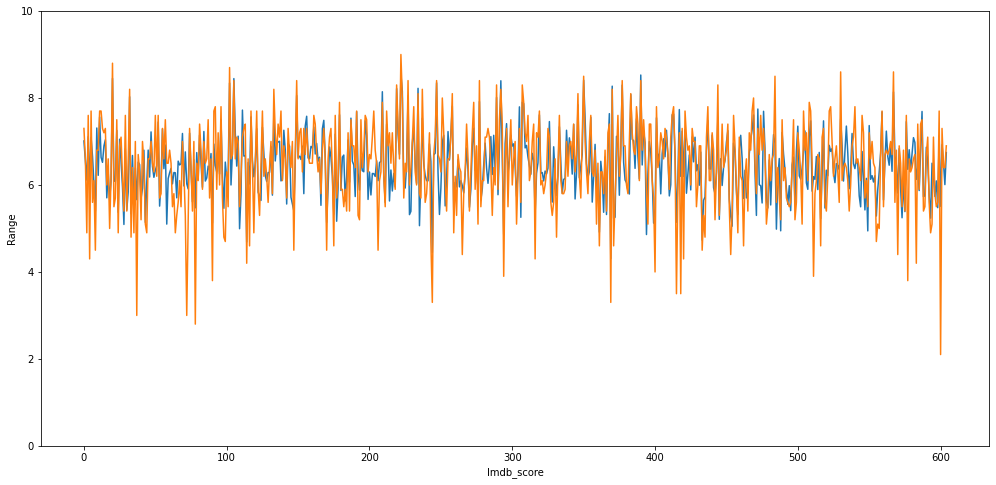

In [117]:
plt.figure(figsize=(17,8))
plt.plot(predictions)
plt.plot(Y_test)
plt.xlabel("Imdb_score")
plt.ylabel("Range")
plt.ylim(0, 10)

**Support Vector Machine**

In [118]:
svm=SVR()

In [119]:
svm.fit(X_train,Y_trian)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [120]:
predictions = svm.predict(X_test)

In [121]:
errors = abs(predictions - Y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2))
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / Y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 0.75
Accuracy: 86.77 %.


(0.0, 10.0)

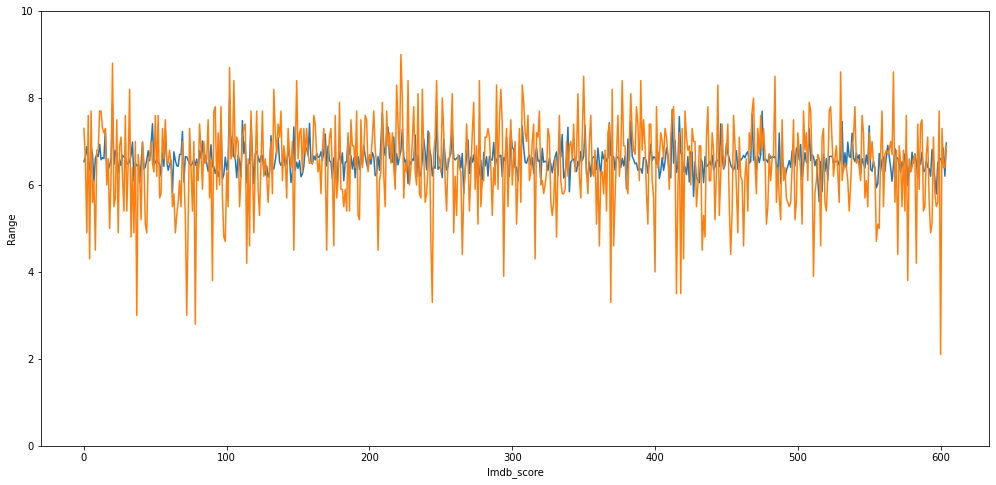

In [122]:
plt.figure(figsize=(17,8))
plt.plot(predictions)
plt.plot(Y_test)
plt.xlabel("Imdb_score")
plt.ylabel("Range")
plt.ylim(0, 10)